In [159]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [334]:
x = np.linspace(1,10, 20) 
y =10 + 0.5 * (x  + np.random.normal(0, 4, size=len(x)))  # linearly increasing Y values

In [336]:
# normalized x values
xn = (x - np.min(x)) / (max(x) - min(x))

In [337]:
# standardized x values
xs = (x - np.mean(x)) / np.std(x)

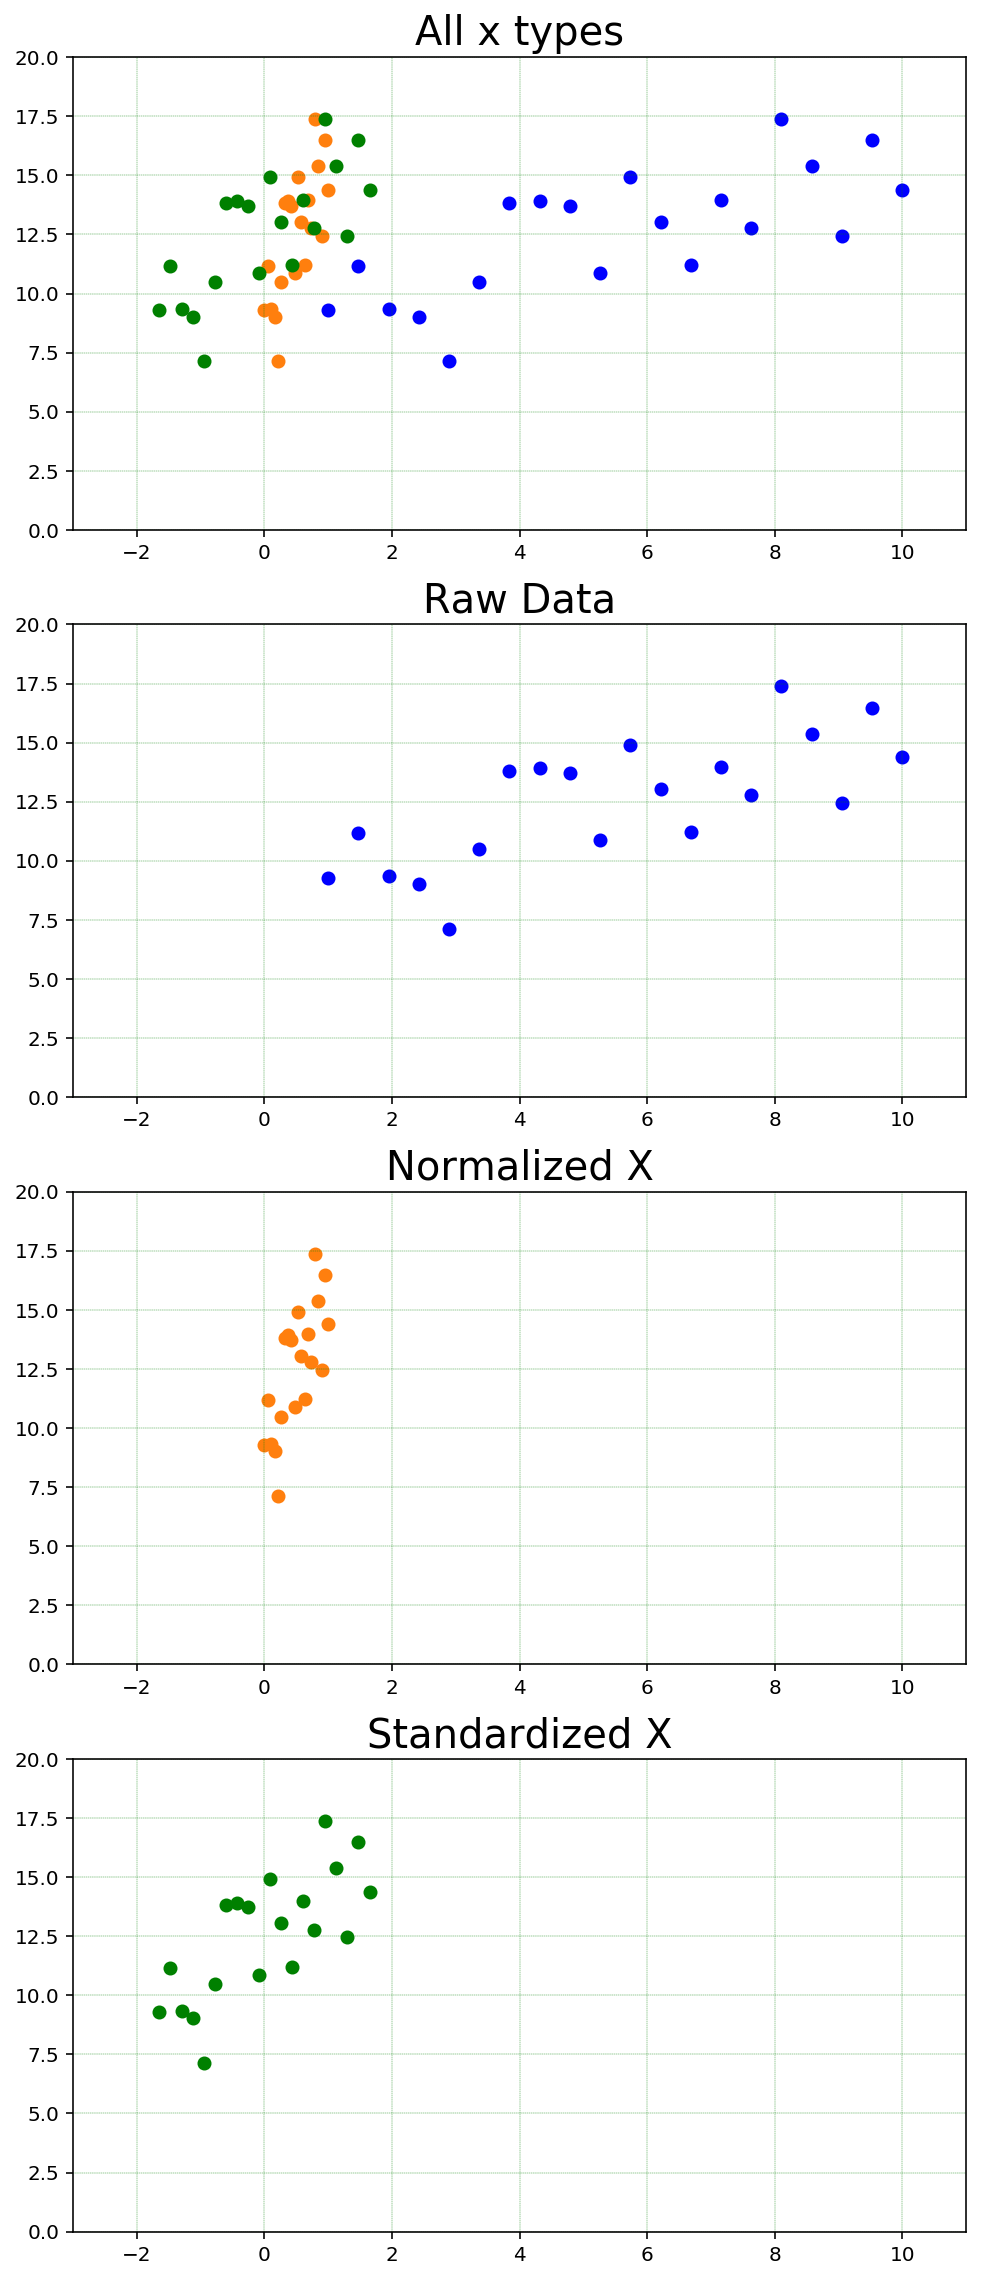

In [338]:
plt.figure(figsize=(8,20))
plt.subplot(411)
plt.title('All x types', fontsize=20)
plt.scatter(x, y, c='b'), plt.scatter(xn, y, c='tab:orange'), plt.scatter(xs, y, c='g')
plt.ylim(0,20)
plt.xlim(-3,11)
plt.grid(color='g', linestyle='--', linewidth=0.2)

plt.subplot(412)
plt.title('Raw Data', fontsize=20)
plt.scatter(x, y, c='b')
plt.ylim(0,20)
plt.xlim(-3,11)
plt.grid(color='g', linestyle='--', linewidth=0.2)

plt.subplot(413)
plt.title('Normalized X', fontsize=20)
plt.scatter(xn, y, c='tab:orange')
plt.ylim(0,20)
plt.xlim(-3,11)
plt.grid(color='g', linestyle='--', linewidth=0.2)

plt.subplot(414)
plt.title('Standardized X', fontsize=20)
plt.scatter(xs,y, c='g')
plt.ylim(0,20)
plt.xlim(-3,11)
plt.grid(color='g', linestyle='--', linewidth=0.2)
plt.show()

### $$\hat{\beta}_1 = r_{XY} \frac{s_Y}{s_X} = \frac{covariance(x,y)}{variance(x)} \\
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

### Raw Data

In [348]:
# Covariance between x and y
cov = np.cov(x,y)[0][1]

# variance of x
variance = np.var(x)

# beta1 = covariance(x,y) / variance(x)
beta1 = cov/variance

# beta0 = y_bar - beta1 * x_bar
beta0 = np.mean(y) - beta1 * np.mean(x)

print('Equation of least squares line: y = {:.03f}X + {:.03f}'.format(beta1, beta0))

Equation of least squares line: y = 0.734X + 8.501


In [353]:
# correlation coefficent does not change with scaleing x
np.corrcoef(x,y)[0][1].round(4)

0.7293

In [358]:
# r-squared 
# if you count the amount of points inside the 95% confidence interval it's about 50% which is the percentage 
#  of the variation explained by the regression line)
(np.corrcoef(x,y)[0][1]**2).round(4)

0.5319

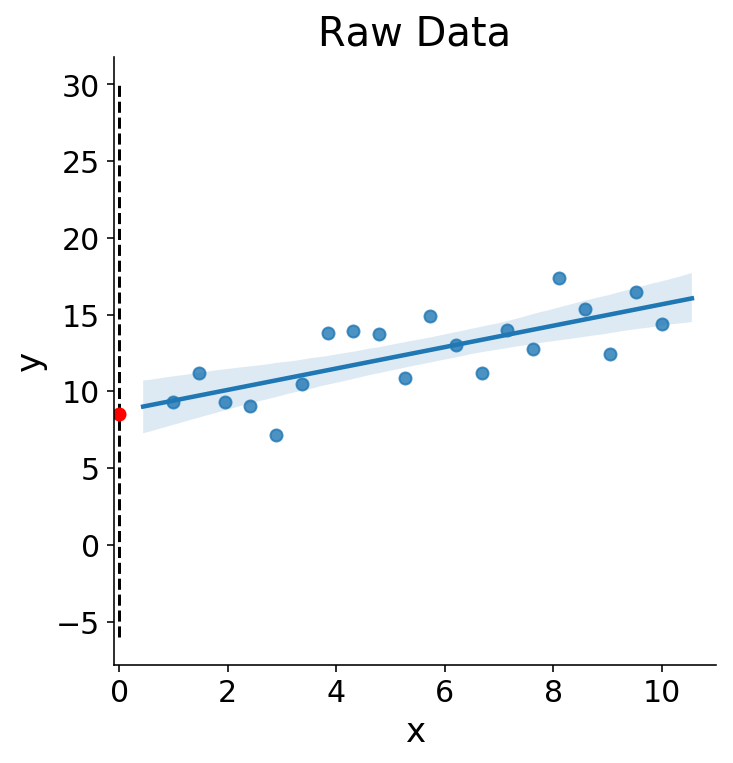

In [341]:
sns.lmplot('x','y',pd.DataFrame({'x':x, 'y':y}),)
plt.title('Raw Data', fontsize=20)
plt.vlines(0,-6,30, linestyles='--')
plt.plot(0, beta0, 'o', color='r')
plt.xlim(-0.1, 11)
plt.xticks(fontsize=15)
plt.xlabel('x', fontsize=17)
plt.yticks(fontsize=15)
plt.ylabel('y', fontsize=17)
plt.show()

### Normalized X

In [349]:
covn = np.cov(xn,y)[0][1]

variancen = np.var(xn)

betan1 = covn/variancen

betan0 = np.mean(y) - betan1 * np.mean(xn)

print('Equation of least squares line: y = {:.03f}X + {:.03f}'.format(betan1, betan0))

Equation of least squares line: y = 6.604X + 9.235


In [343]:
# correlation coefficent does not change with scaleing x
np.corrcoef(xn, y)[0][1].round(4)

0.7293

In [359]:
# r-squared
(np.corrcoef(xn, y)[0][1]**2).round(4)

0.5319

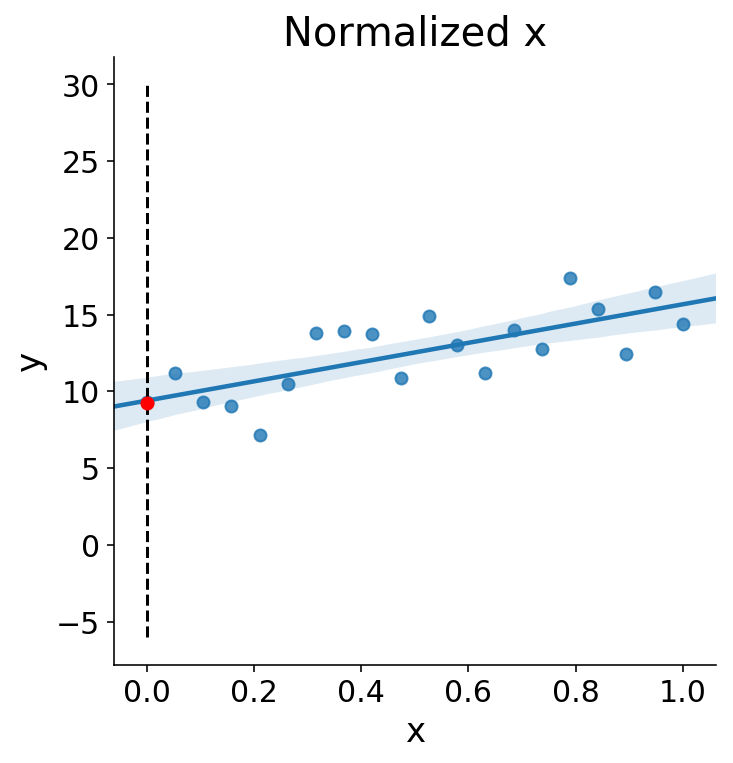

In [344]:
sns.lmplot('xn', 'y', pd.DataFrame({'xn':xn, 'y':y}))
plt.title('Normalized x', fontsize=20)
plt.vlines(0,-6,30, linestyles='--')
plt.plot(0, betan0, 'o', color='r')
# plt.xlim(-5,11)
plt.xticks(fontsize=15)
plt.xlabel('x', fontsize=17)
plt.yticks(fontsize=15)
plt.ylabel('y', fontsize=17)
plt.show()

### Standardize X

In [350]:
covs = np.cov(xs,y)[0][1]

variances = np.var(xs)

betas1 = covs/variances

betas0 = np.mean(y) - betas1 * np.mean(xs)

print('Equation of least squares line: y = {:.03f}X + {:.03f}'.format(betas1, betas0))

Equation of least squares line: y = 2.004X + 12.537


In [346]:
# correlation coefficent does not change with scaleing x
np.corrcoef(xs, y)[0][1].round(4)

0.7293

In [360]:
# r-squared
(np.corrcoef(xs, y)[0][1]**2).round(4)

0.5319

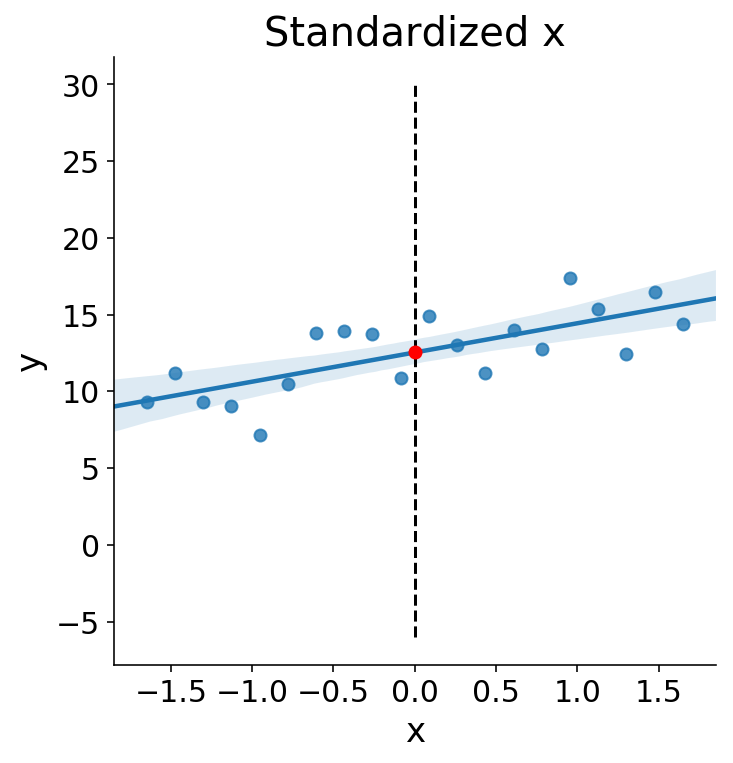

In [347]:
sns.lmplot('xs', 'y', pd.DataFrame({'xs':xs, 'y':y}))
plt.title('Standardized x', fontsize=20)
plt.vlines(0,-6,30, linestyles='--')
plt.plot(0, betas0, 'o', color='r')
# plt.xlim(-5,11)
plt.xticks(fontsize=15)
plt.xlabel('x', fontsize=17)
plt.yticks(fontsize=15)
plt.ylabel('y', fontsize=17)
plt.show()